Skeleton code for k-means clustering mini-project.

In [53]:
import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
%matplotlib inline

In [54]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

In [55]:
from sklearn.preprocessing import MinMaxScaler
# (feature_range=(0, 1), copy=True

[  1   4   7  17  21  24  26  27  36  37  38  43  44  48  49  50  53  54
  56  72  73  77  82  87  89  90  92  98 108 109 110 111 118 119 121]
[  1   4   7  17  21  24  26  27  36  37  38  43  44  48  49  50  53  54
  56  72  73  77  82  87  89  90  92  98 108 109 110 111 118 119 121]


/opt/miniconda3/envs/uda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/opt/miniconda3/envs/uda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/opt/miniconda3/envs/uda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1)

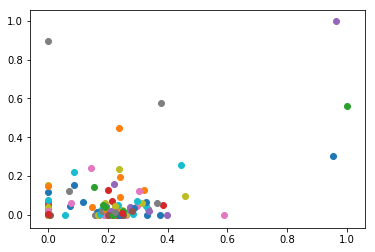

In [56]:
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)

### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list)

print np.where((data[:,1] >= 2e5) & (data[:,2] >= 1e6))[0]

salary_cond = np.where(data[:,1] >= 2e5)
exer_stock_cond = np.where(data[:,2] >= 1e6)

intersection = np.intersect1d(salary_cond, exer_stock_cond)
print(intersection)

scaler = MinMaxScaler()
feature_1_data = scaler.fit_transform(data[:,1])
data[:,1] = feature_1_data

scaler = MinMaxScaler()
feature_2_data = scaler.fit_transform(data[:,2])
data[:,2] = feature_2_data

poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

In [57]:
### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

from sklearn.cluster import KMeans
# (n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')

def get_kmeans_classifier(features, n_clusters, **kwargs):
    clf = KMeans(2)
    clf.fit(features)

    labels = clf.labels_

    pred = clf.predict(features)
    
    return (clf, pred, labels)

In [58]:
clf, pred, _ = get_kmeans_classifier(finance_features, 2)

In [59]:
### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
def draw_cluster(pred, features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2):
    try:
        Draw(pred, features, poi=poi, mark_poi=mark_poi, name=name, f1_name=f1_name, f2_name=f2_name)
    except NameError:
        print "no predictions object named pred found, no clusters to plot"

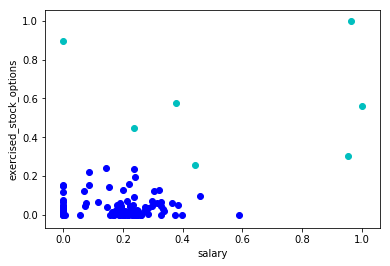

In [60]:
draw_cluster(pred, finance_features, poi)